# PCA to visualize K-Means clusters

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    '''
    Creates 2D scatterplot to visualize the outcomes of K-Means clustering along two principal components.
    '''
    colors = cycle(['m', 'g', 'r', 'b', 'aqua', 'yellow'])
    target_ids = range(len(target_names))
    plt.figure(figsize=(10,10))
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], 
                    data[target == i, 1], 
                    c = c, 
                    label = label, 
                    edgecolors = 'gray')
        plt.legend()

## Load data

In [3]:
company_top_prob_4 = pd.read_pickle('company_top_prob_4.pkl')
company_top_prob_4

,fcra_fdcpa_0,payment_arrangement_1,interest_fees_2,verify_request_3,representative_4,credit_report_5,harassment_6,identity_theft_7,wage_garnish_8,medical_debt_9,statute_limitation_11,letter_13,police_report_18,debt_collection_19,num_complaints,avg_word_cnt,cluster_labels
Company,,,,,,,,,,,,,,,,,
"ACIMA CREDIT, LLC",0.000001,0.357143,0.428195,0.142858,0.356915,0.214286,0.277875,0.071429,0.000005,0.000002,0.000001,0.290881,0.344567,0.000969,14,234,5
AES/PHEAA,0.000001,0.464286,0.281508,0.053572,0.250094,0.214286,0.214982,0.250000,0.482576,0.000001,0.144534,0.299323,0.149157,0.215823,56,175,5
AFNI INC.,0.082570,0.137615,0.168184,0.238533,0.196649,0.376147,0.230811,0.155964,0.009246,0.018955,0.110126,0.426620,0.303640,0.373855,109,156,4
ALLY FINANCIAL INC.,0.111112,0.244445,0.148646,0.066668,0.133041,0.222223,0.422170,0.044445,0.047494,0.025315,0.044627,0.207192,0.128400,0.151483,45,117,0
"AMCOL Systems, Inc.",0.060607,0.090910,0.157752,0.060607,0.093054,0.272728,0.084689,0.151516,0.000003,0.497695,0.030774,0.280312,0.089983,0.284617,33,116,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Westlake Services, LLC",0.148149,0.185186,0.163579,0.074075,0.074151,0.222223,0.116777,0.222223,0.051184,0.000073,0.074100,0.151396,0.219354,0.170282,27,133,0
"Williams & Fudge, Inc",0.000002,0.375000,0.291950,0.041668,0.385793,0.083334,0.594284,0.041668,0.251496,0.000001,0.125421,0.501086,0.120947,0.755132,24,298,3
"Windham Professionals, Inc.",0.000001,0.076924,0.155120,0.153847,0.347486,0.000001,0.803863,0.000001,0.000003,0.076924,0.230768,0.294979,0.104992,0.466119,13,162,0


In [4]:
columns = company_top_prob_4.columns[:16]
columns

Index(['fcra_fdcpa_0', 'payment_arrangement_1', 'interest_fees_2',
       'verify_request_3', 'representative_4', 'credit_report_5',
       'harassment_6', 'identity_theft_7', 'wage_garnish_8', 'medical_debt_9',
       'statute_limitation_11', 'letter_13', 'police_report_18',
       'debt_collection_19', 'num_complaints', 'avg_word_cnt'],
      dtype='object')

In [5]:
X = company_top_prob_4.drop('cluster_labels', 1)
Y = company_top_prob_4['cluster_labels']

In [6]:
rscale = RobustScaler() #same scaler as for K-Means
X_scaled = rscale.fit_transform(X)

## Create and fit PCA model

In [7]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_transf = pca.transform(X_scaled)
print(f'shape of original X_scaled: {X_scaled.shape}')
print(f'shape of X_scaled using 2 principal components: {X_transf.shape}')

shape of original X_scaled: (337, 16)
shape of X_scaled using 2 principal components: (337, 2)


## Examine variance explained by each principal component

In [8]:
# 62% of variance explained by these 2 dimensions
pca.explained_variance_ratio_

array([0.44619333, 0.17648758])

- the PCs correspond to combinations of the original features
- the PCS themselves are stored as an attribute of the fitted PCA object

In [9]:
pd.DataFrame(pca.components_.round(3), index=['PC1', 'PC2'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
PC1,0.009,-0.036,-0.038,0.016,-0.045,0.03,-0.041,0.012,-0.074,-0.022,-0.034,-0.023,0.024,-0.021,0.991,-0.046
PC2,-0.043,0.214,0.323,-0.054,0.262,-0.13,0.185,-0.125,0.500,-0.166,0.356,0.179,0.152,0.178,0.118,0.452


## Heatmap representing correlation between the features and the PC itself

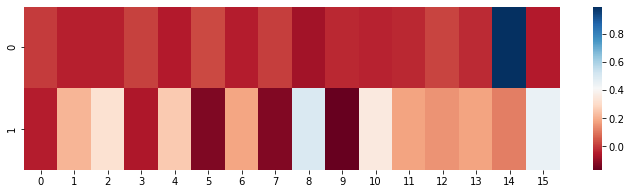

In [10]:
map = pd.DataFrame(pca.components_)
plt.figure(figsize=(12,3))
sns.heatmap(map, cmap='RdBu');

## PCA to visualize clusters

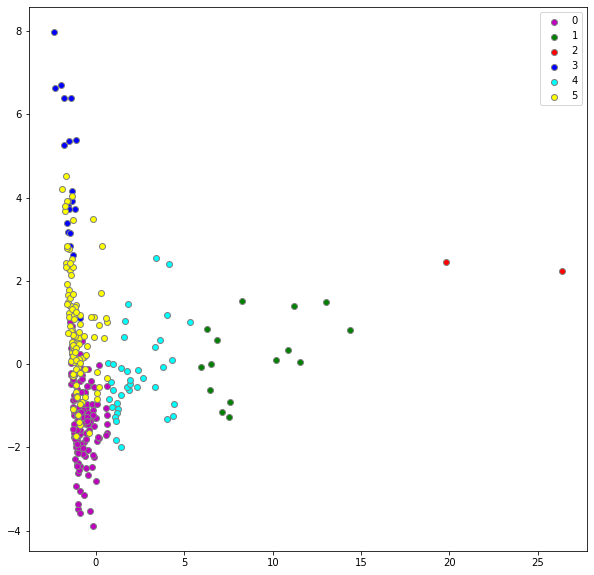

In [12]:
plot_PCA_2D(X_transf, target=Y, target_names=list(set(Y)))